1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

import time, warnings
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
defi = pd.read_excel('Leads Data Dictionary.xlsx')
defi.head()

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...


In [3]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Shape of the data

In [4]:
df.shape

(9240, 37)

### Info of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [106]:
df.drop_duplicates(inplace=True)

# Null Value Treatment

In [7]:
df = df.replace('Select', np.nan)

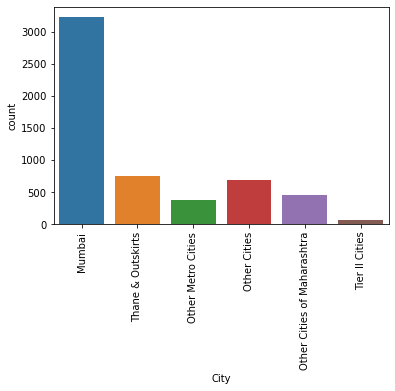

In [8]:
sns.countplot(df['City'])
xticks(rotation = 90)
plt.show()

In [9]:
df['City'].isnull().sum()

3669

In [10]:
df['City'].fillna('Mumbai',inplace=True)

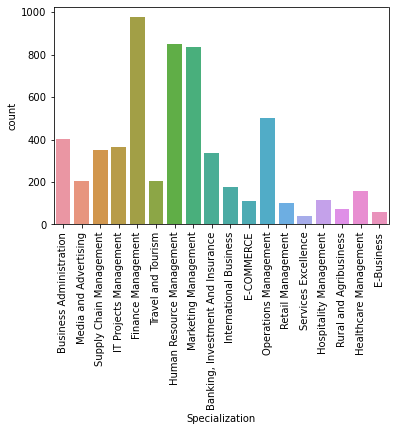

In [11]:
sns.countplot(df['Specialization'])
xticks(rotation = 90)
plt.show()

In [12]:
df['Specialization'].isnull().sum()

3380

In [13]:
df['Specialization'].fillna('Others',inplace=True)

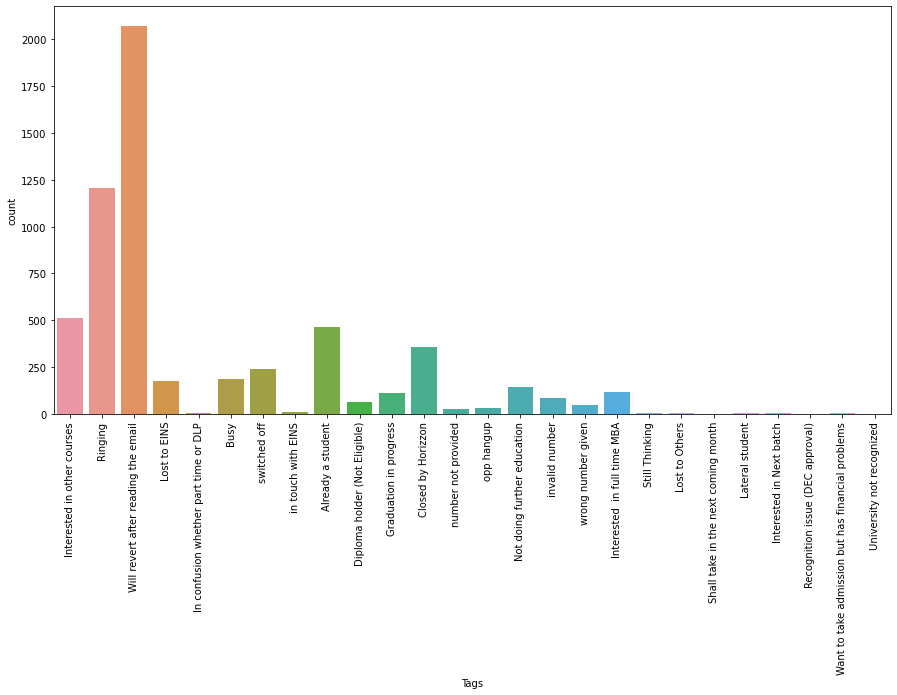

In [14]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(df['Tags'])
xticks(rotation = 90)
plt.show()

In [15]:
df['Tags'].isnull().sum()

3353

In [16]:
df['Tags'].fillna('Will revert after reading the email',inplace=True)

In [17]:
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [18]:
df['What matters most to you in choosing a course'].isnull().sum()

2709

In [19]:
df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [20]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [21]:
df['What is your current occupation'].isnull().sum()

2690

In [22]:
df['What is your current occupation'].fillna('Unemployed',inplace=True)

In [23]:
df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [24]:
df['Country'].isnull().sum()

2461

In [25]:
df['Country'].fillna('India',inplace=True)

In [26]:
df['Last Activity'].fillna('Others',inplace=True)

In [27]:
df_null = pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2))
df_null = df_null.sort_values(by=0,ascending=False)

In [28]:
df_null[df_null[0]!=0]

,0
How did you hear about X Education,78.46
Lead Profile,74.19
Lead Quality,51.59
Asymmetrique Activity Index,45.65
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Asymmetrique Profile Index,45.65
TotalVisits,1.48
Page Views Per Visit,1.48
Lead Source,0.39


Above are the columns which have null values.

### Dropping the columns which are greater than 30%

In [29]:
cols = df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 30):
        df.drop(i, 1, inplace = True)

In [30]:
df.describe()
#include='all'

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [31]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [32]:
df.dropna(inplace = True)

In [33]:
df.shape

(9074, 28)

# Univariate Analysis

#### Lead Origin

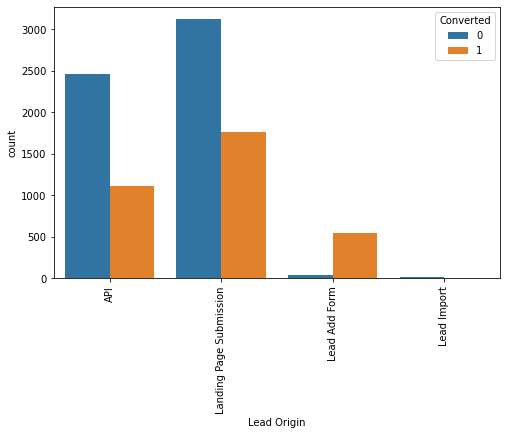

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

Lead Add Form has more than 90% conversion rate but count of lead are not very high.

Lead Import are very less in count.

#### Lead Source

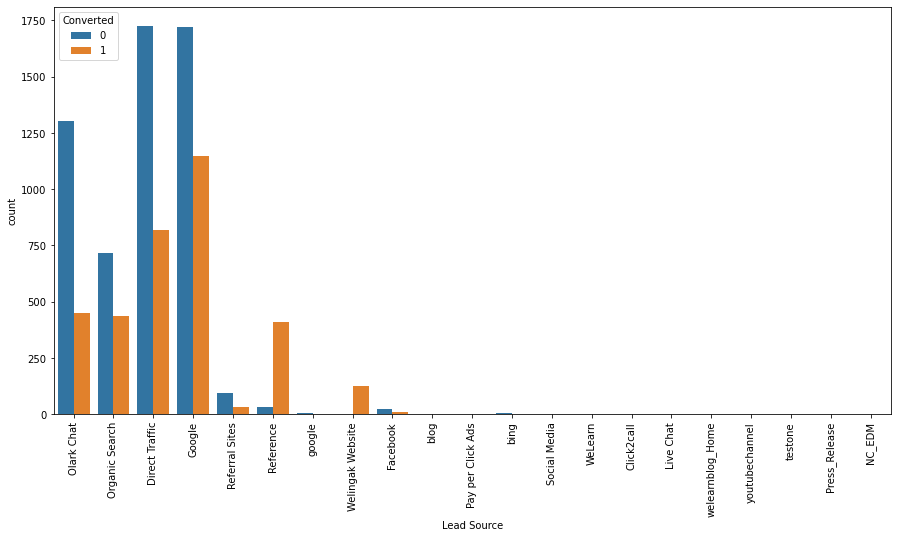

In [35]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [36]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

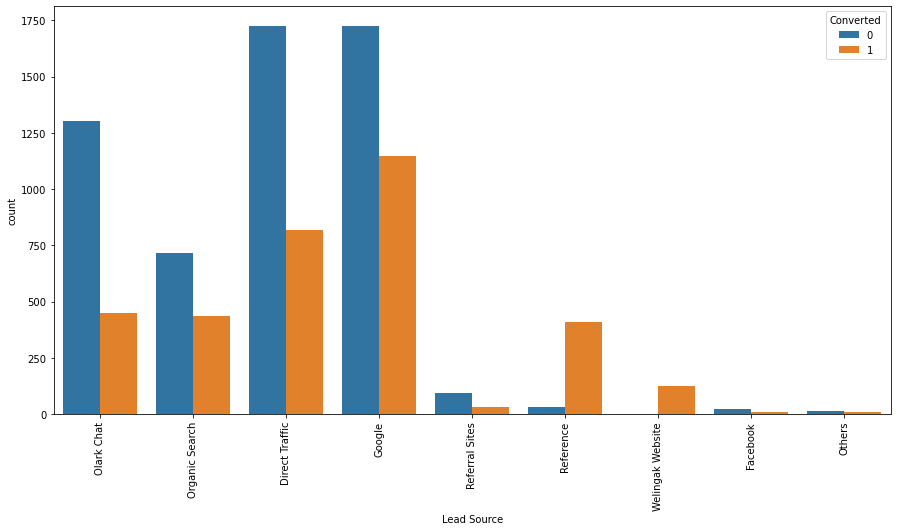

In [37]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

Google and Direct traffic generates maximum number of leads.

Conversion Rate of reference leads and leads through welingak website is high.

#### Do Not Email & Do Not Call

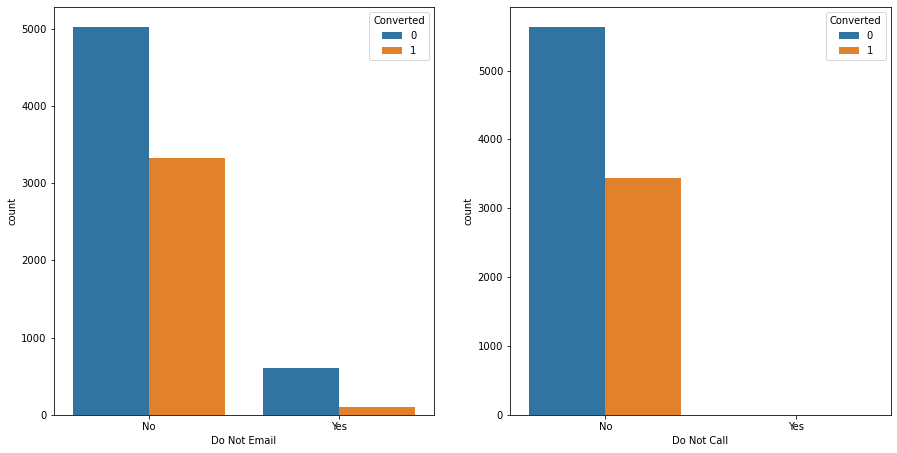

In [38]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])
plt.show()

#### Last Activity

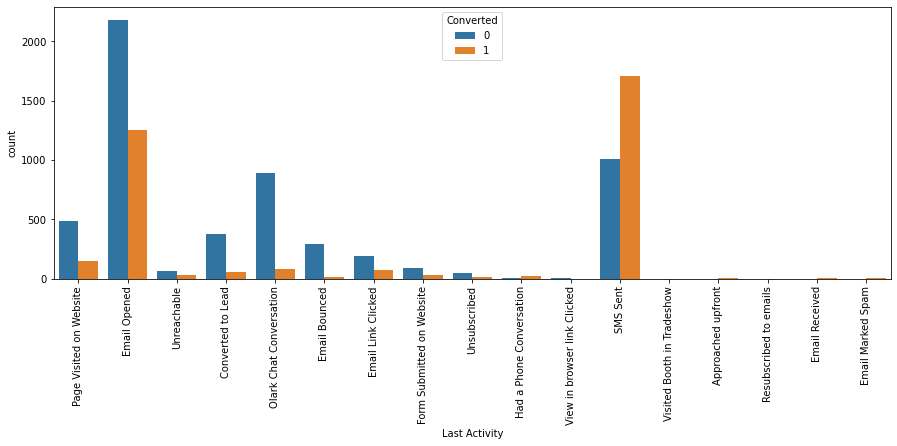

In [39]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

#### Tags

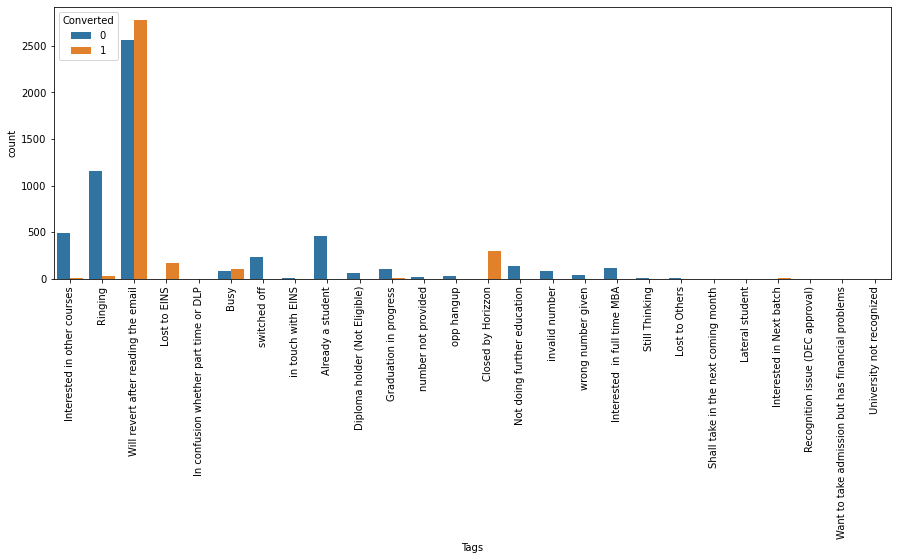

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(df['Tags'], hue=df['Converted'])
xticks(rotation = 90)
plt.show()

In [41]:
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

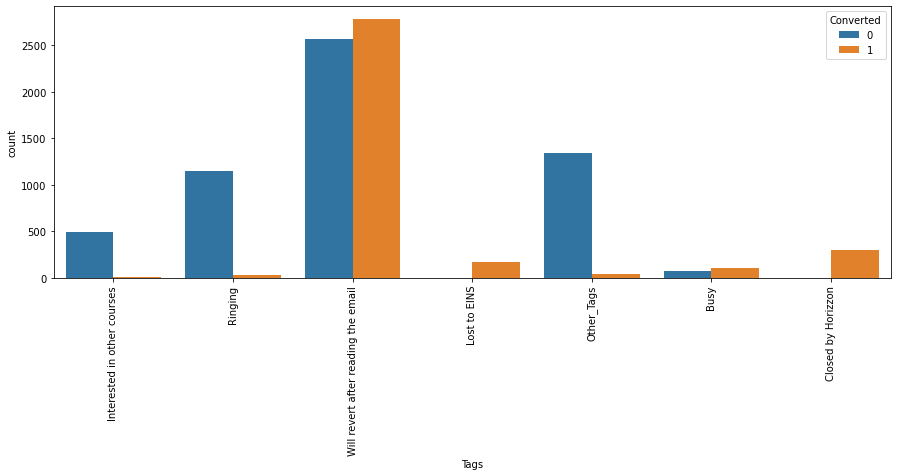

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(df['Tags'], hue=df['Converted'])
xticks(rotation = 90)
plt.show()

#### Last Activity

In [43]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

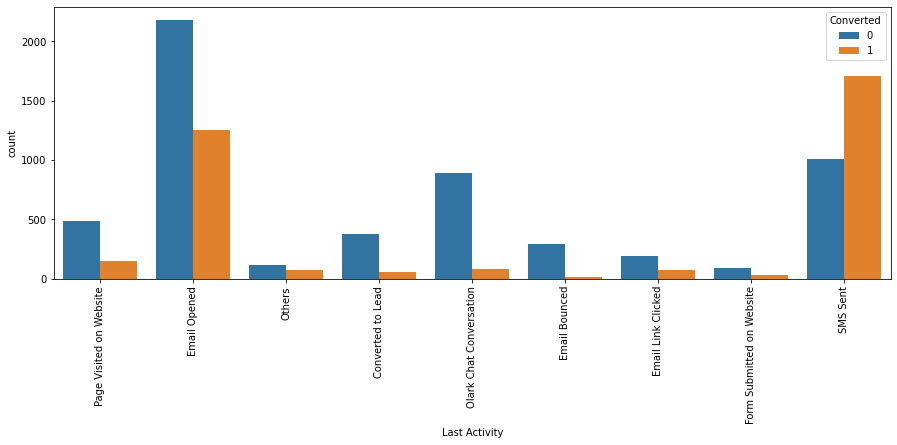

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(df['Last Activity'], hue=df['Converted'])
xticks(rotation = 90)
plt.show()

#### Box Plots of Continuous Columns

In [45]:
df.select_dtypes(include='number').columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

Boxplot for : Converted


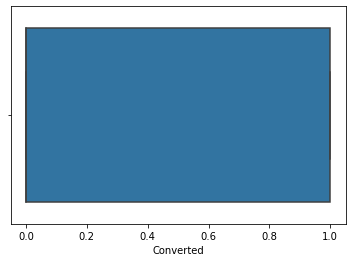

Boxplot for : TotalVisits


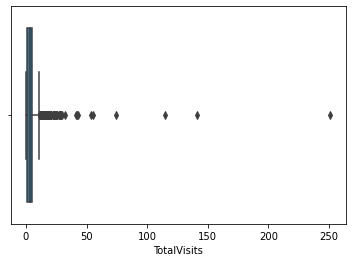

Boxplot for : Total Time Spent on Website


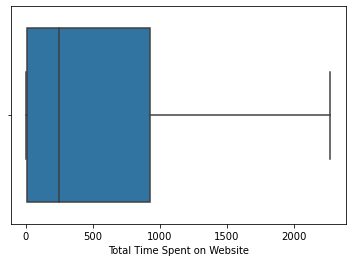

Boxplot for : Page Views Per Visit


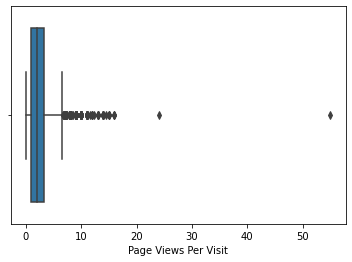

In [46]:
for i in df.select_dtypes(include='number').columns:
    print('Boxplot for :',i)
    sns.boxplot(df[i])
    plt.show()

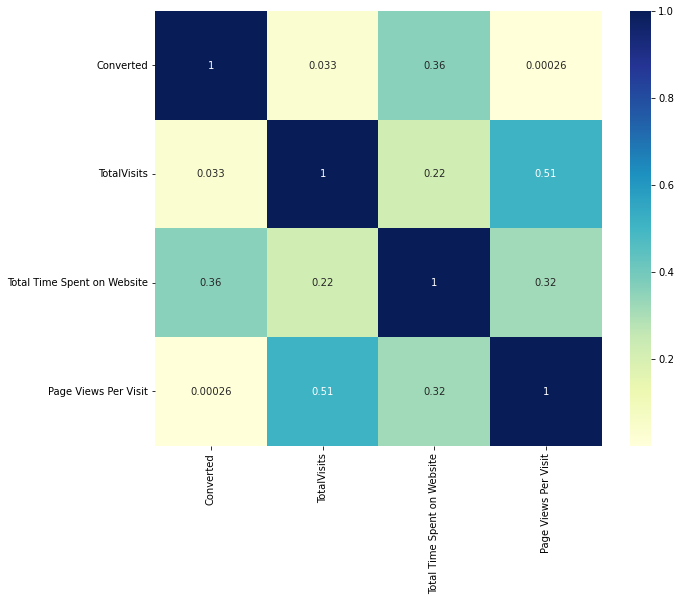

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

<AxesSubplot:>

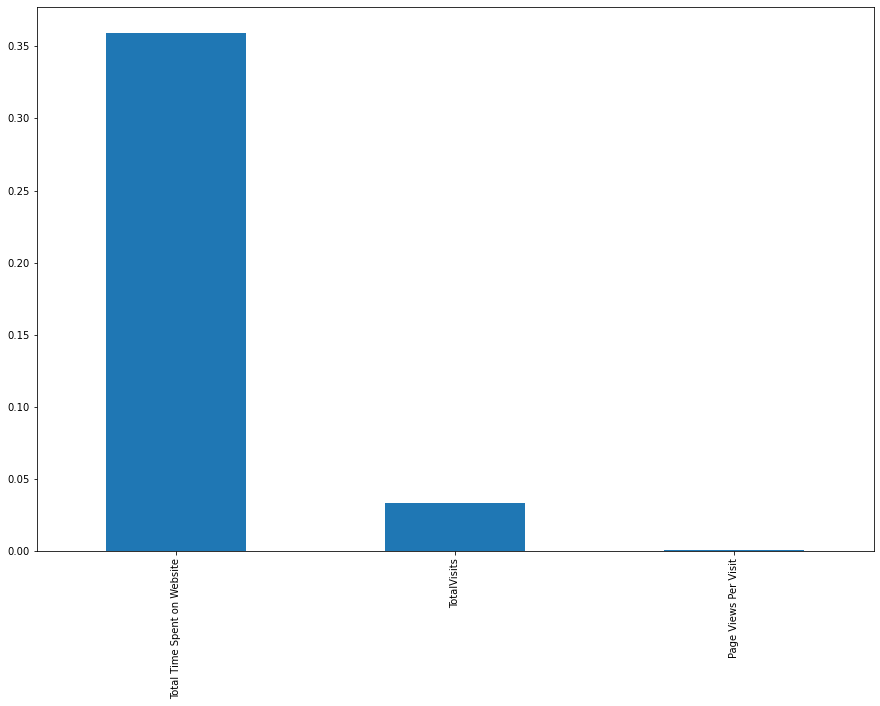

In [48]:
plt.figure(figsize=(15,10))
corr= df.corr()
corr['Converted'].sort_values(ascending=False)[1:].plot(kind='bar')

In [49]:
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

df = pd.concat([df,dummy],1)

In [51]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [52]:
df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1,inplace=True)

In [53]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [55]:
X = df.drop('Converted', axis=1)
y = df['Converted']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [57]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [58]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [59]:
pd.DataFrame(y_pred).head()

,0
0,1
1,1
2,1
3,1
4,1


## Model Evaluation

## Model accuracy

In [60]:
metrics.accuracy_score(y_test,y_pred)

0.47888358428204186

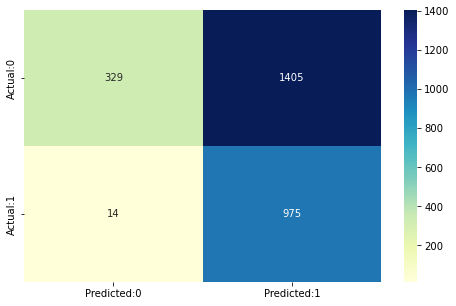

In [61]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [62]:
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[abs(i) for i in logreg.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False).head(10)

,feature,feature_importance
92,Tags_Closed by Horizzon,4.472859
94,Tags_Lost to EINS,4.277858
96,Tags_Ringing,4.041772
95,Tags_Other_Tags,3.049604
93,Tags_Interested in other courses,2.384133
13,Lead Source_Welingak Website,2.005802
4,Lead Origin_Lead Add Form,1.971268
82,What is your current occupation_Unemployed,1.524221
115,Last Notable Activity_SMS Sent,1.498736
14,Do Not Email_Yes,1.476459


###  `Tags` and `Lead Source` and `What is your current occupation` and `Last Notable activity` are the top 4 variables which contribute most towards the probability of a lead getting converted

In [63]:
feature_importance.sort_values('feature_importance',ascending=True).head(10)

,feature,feature_importance
38,Country_Kenya,0.000000
45,Country_Philippines,0.000000
54,Country_Tanzania,0.000000
84,What matters most to you in choosing a course_...,0.000000
41,Country_Malaysia,0.001136
116,Last Notable Activity_Unreachable,0.001140
51,Country_Sri Lanka,0.001906
30,Country_Denmark,0.004504
55,Country_Uganda,0.005018
85,What matters most to you in choosing a course_...,0.005592


### `Country` and `What matters most to you in choosing a course` and `Last Notable Activity` are the 3 variables which should be focused for the most in order to increase the probability of lead conversion.

In [64]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [65]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.47888358428204186 

 The Miss-classification = 1-Accuracy =  0.5211164157179582 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9858442871587462 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.18973471741637832 

 Positive Predictive value = TP / (TP+FP) =  0.4096638655462185 

 Negative predictive Value = TN / (TN+FN) =  0.9591836734693877 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  1.2166932341162036 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.07460792117548372


In [66]:
y_pred_prob=logreg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Conversion(0)','Prob of No Conversion (1)'])
y_pred_prob_df.head()

,Prob of Conversion(0),Prob of No Conversion (1)
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.000367,0.999633
4,0.000000,1.000000


In [67]:
from sklearn.preprocessing import binarize
for i in range(1,10):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
           'accuracy is',(TP+TN)/float(TP+TN+FP+FN),'\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')


With 0.1 threshold the Confusion Matrix is  
 [[ 139 1595]
 [   3  986]] 
 with 1125 correct predictions and 3 Type II errors( False Negatives) 

 accuracy is 0.47888358428204186 

 Sensitivity:  0.9969666329625885 Specificity:  0.08016147635524798 



With 0.2 threshold the Confusion Matrix is  
 [[ 275 1459]
 [   6  983]] 
 with 1258 correct predictions and 6 Type II errors( False Negatives) 

 accuracy is 0.47888358428204186 

 Sensitivity:  0.993933265925177 Specificity:  0.15859284890426759 



With 0.3 threshold the Confusion Matrix is  
 [[ 298 1436]
 [  10  979]] 
 with 1277 correct predictions and 10 Type II errors( False Negatives) 

 accuracy is 0.47888358428204186 

 Sensitivity:  0.9898887765419616 Specificity:  0.17185697808535177 



With 0.4 threshold the Confusion Matrix is  
 [[ 324 1410]
 [  10  979]] 
 with 1303 correct predictions and 10 Type II errors( False Negatives) 

 accuracy is 0.47888358428204186 

 Sensitivity:  0.9898887765419616 Specificity:  0.186851211

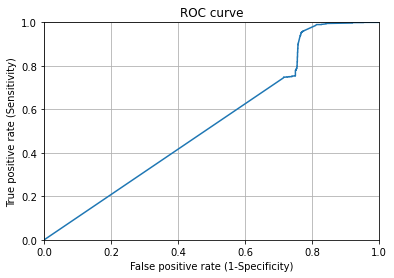

In [68]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

- A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate ( true positives/ total  positives) versus the false positive rate ( false positives /total  negatives) for all possible choices of thresholds.
- A model with good classification accuracy should have significantly more true positives than false positives at all thresholds. 
- The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

### Area Under The Curve (AUC)

- The area under the ROC curve quantifies model classification accuracy ; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset.
- An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that  as possible. An area of 1 is ideal. 
- The closer the AUC to 1 the better.

In [69]:
metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.5385418962684104

# Model Building by Statsmodels

In [70]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                          115
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1557.6
Date:                Sun, 19 Jun 2022   Deviance:                       3115.1
Time:                        10:43:13   Pearson chi2:                 1.17e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      24.1404   1.32e+05      0.000      1.000    -2.6e+05     2.6e+05
TotalVisits                                                                 0.1391      0.036      3.852      0.000       0.068       0.210
Total Time Spent on Website                                                 1.1807      0.057     20.764      0.000       1.069       1.292
Page Views Per Visit                                                       -0.1477      0.068     -2.172      0.030      -0.281      -0.014
Lead Origin_Landing Page Submission                                        -1.3259      0.189     -7.033      0.000      -1.695      -0.956
Lead Origin_Lead Add Form                                                   0.3747      1.307      0.287      0.774      -2.188       2.937
Lead Origin_Lead Import                                                    25.7519   1.31e+05      0.000      1.000   -2.56e+05    2.56e+05
Lead Source_Facebook                                                      -24.4575   1.31e+05     -0.000      1.000   -2.56e+05    2.56e+05
Lead Source_Google                                                          0.0135      0.159      0.085      0.932      -0.297       0.324
Lead Source_Olark Chat                                                      0.7486      0.215      3.485      0.000       0.328       1.170
Lead Source_Organic Search                                                  0.1759      0.181      0.973      0.331      -0.178       0.530
Lead Source_Others                                                          0.5704      0.847      0.673      0.501      -1.090       2.231
Lead Source_Reference                                                       2.3704      1.352      1.754      0.079      -0.279       5.020
Lead Source_Referral Sites                                                 -0.0778      0.427     -0.182      0.855      -0.915       0.759
Lead Source_Welingak Website                                                4.4763      1.508      2.969      0.003       1.522       7.431
Do Not Email_Yes                                                           -1.6991      0.291     -5.836      0.000      -2.270      -1.129
Do Not Call_Yes                                                            21.6138   8.38e+04      0.000      1.000   -1.64e+05    1.64e+05
Last Activity_Email Bounced                                                -0.8325      0.821     -1.014      0.311      -2.442       0.777
Last Activity_Email Link Clicked                                            0.8815      0.563      1.566      0.117      -0.222       1.985
Las

In [71]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [72]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False])

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 53),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 52),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', False, 78),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 49),
 ('Lead Source_Others', False, 93),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 60),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 61),
 ('Last Activity_Email Bounced', False, 20),
 ('Last Activity_Email Link Clicked', False, 25),
 ('Last Activity_Email Opened', False, 90),
 ('Last Activity_Form Submitted on Website', False, 68),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 46),
 ('Last Activity_SMS Sent', F

In [74]:
col = X_train.columns[rfe.support_]

In [75]:
X_train = X_train[col]

In [76]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.3
Date:                Sun, 19 Jun 2022   Deviance:                       3364.5
Time:                        10:43:17   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             3.1172      0.248     12.554      0.000       2.631       3.604
Total Time Spent on Website                       1.0701      0.049     21.835      0.000       0.974       1.166
Lead Origin_Landing Page Submission              -1.7597      0.160    -10.964      0.000      -2.074      -1.445
Lead Origin_Lead Add Form                         2.5941      0.326      7.946      0.000       1.954       3.234
Lead Source_Welingak Website                      2.3165      0.809      2.864      0.004       0.731       3.902
Do Not Email_Yes                                 -1.7161      0.215     -7.994      0.000      -2.137      -1.295
Last Activity_Others                              1.4014      0.287      4.882      0.000       0.839       1.964
Specialization_Others                            -1.6421      0.160    -10.273      0.000      -1.955      -1.329
What is your current occupation_Unemployed       -2.3363      0.207    -11.308      0.000      -2.741      -1.931
Tags_Closed by Horizzon                           4.6321      0.727      6.369      0.000       3.207       6.058
Tags_Interested in other courses                 -3.8058      0.360    -10.575      0.000      -4.511      -3.100
Tags_Lost to EINS                                 4.5502      0.725      6.279      0.000       3.130       5.971
Tags_Other_Tags                                  -4.1107      0.230    -17.844      0.000      -4.562      -3.659
Tags_Ringing                                     -5.0371      0.266    -18.953      0.000      -5.558      -4.516
Last Notable Activity_Olark Chat Conversation    -1.2235      0.384     -3.190      0.001      -1.975      -0.472
Last Notable Activity_SMS Sent                    2.7592      0.119     23.156      0.000       2.526       2.993
=================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,6.64
1,Lead Origin_Landing Page Submission,4.31
6,Specialization_Others,3.28
2,Lead Origin_Lead Add Form,1.66
14,Last Notable Activity_SMS Sent,1.46
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.30
12,Tags_Ringing,1.28
0,Total Time Spent on Website,1.23
8,Tags_Closed by Horizzon,1.17


``` All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only ```

In [78]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3009    0.240436
1012    0.070523
9226    0.001059
4750    0.971772
7987    0.996764
1281    0.940550
2880    0.127654
4971    0.996231
7536    0.875846
1248    0.017502
dtype: float64

In [79]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
3009,0,0.240436
1012,0,0.070523
9226,0,0.001059
4750,1,0.971772
7987,1,0.996764


In [80]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
3009,0,0.240436,0
1012,0,0.070523,0
9226,0,0.001059,0
4750,1,0.971772,1
7987,1,0.996764,1


In [81]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3631,  274],
       [ 383, 2063]])

##### Overall Accuracy

In [82]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.896551724137931


In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [85]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.896551724137931 

 The Miss-classification = 1-Accuracy =  0.10344827586206895 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8434178250204415 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9298335467349552 

 Positive Predictive value = TP / (TP+FP) =  0.8827556696619597 

 Negative predictive Value = TN / (TN+FN) =  0.9045839561534629 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  12.020243090163596 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.16839807030988047


In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

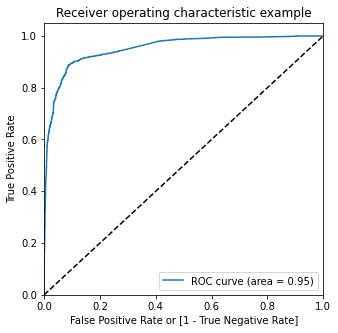

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [89]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.240436,0,1,1,1,0,0,0,0,0,0,0
1012,0,0.070523,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.001059,0,1,0,0,0,0,0,0,0,0,0
4750,1,0.971772,1,1,1,1,1,1,1,1,1,1,1
7987,1,0.996764,1,1,1,1,1,1,1,1,1,1,1


In [90]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.728389  0.982420  0.569270
0.2   0.2  0.858447  0.921913  0.818694
0.3   0.3  0.896394  0.899428  0.894494
0.4   0.4  0.902535  0.884301  0.913956
0.5   0.5  0.896552  0.843418  0.929834
0.6   0.6  0.891356  0.809894  0.942382
0.7   0.7  0.881593  0.754702  0.961076
0.8   0.8  0.850732  0.643091  0.980794
0.9   0.9  0.826169  0.565004  0.989757


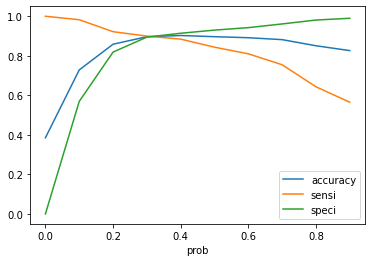

In [91]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.240436,0,1,1,1,0,0,0,0,0,0,0,0
1012,0,0.070523,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.001059,0,1,0,0,0,0,0,0,0,0,0,0
4750,1,0.971772,1,1,1,1,1,1,1,1,1,1,1,1
7987,1,0.996764,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9025350338529365

In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3569,  336],
       [ 283, 2163]])

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Accuracy

In [96]:
((TP + TN)/(TP+TN+FP+FN))*100

90.25350338529366

### Sensitivity

In [97]:
(TP/(TP+FN))*100

88.4300899427637

### Specificity

In [98]:
(TN/(TN+FP))*100

91.39564660691421